<a href="https://colab.research.google.com/github/Vishnu-K-Menon/FashionMNIST-using-CNN/blob/main/fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificaton of Fashnion MNIST dataset using 2Dconvultional neural network

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
training_images  = train_images / 255.0 #normalizing the pixel values of training images 
test_images = test_images / 255.0 #normalizing the pixel values of testing images 

LABEL: 5

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 

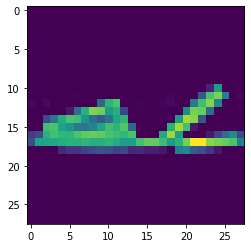

In [5]:
index = 320
np.set_printoptions(linewidth=320)
print(f'LABEL: {train_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {train_images[index]}')

plt.imshow(training_images[index])

In [6]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('accuracy') > 0.98):
      print("\nReached 98% accuracy, canceling training")
      self.model.stop_training = True

callbacks = myCallback()

In [7]:
callbacks = myCallback()
model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
 tf.keras.layers.MaxPooling2D(2, 2),
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation='relu'),
 tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               8

In [9]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

predict = model.fit(training_images, train_labels, epochs=15, callbacks = [callbacks])

Epoch 1/15
1875/1875 [==============================] - 105s 56ms/step - loss: 0.4153 - accuracy: 0.8481
Epoch 2/15
1875/1875 [==============================] - 102s 55ms/step - loss: 0.2789 - accuracy: 0.8967
Epoch 3/15
1875/1875 [==============================] - 103s 55ms/step - loss: 0.2333 - accuracy: 0.9132
Epoch 4/15
1875/1875 [==============================] - 101s 54ms/step - loss: 0.1993 - accuracy: 0.9241
Epoch 5/15
1875/1875 [==============================] - 101s 54ms/step - loss: 0.1703 - accuracy: 0.9359
Epoch 6/15
1875/1875 [==============================] - 102s 55ms/step - loss: 0.1434 - accuracy: 0.9460
Epoch 7/15
1875/1875 [==============================] - 102s 54ms/step - loss: 0.1215 - accuracy: 0.9527
Epoch 8/15
1875/1875 [==============================] - 102s 54ms/step - loss: 0.1017 - accuracy: 0.9614
Epoch 9/15
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0848 - accuracy: 0.9679
Epoch 10/15
1875/1875 [==============================] 

In [10]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 14ms/step - loss: 0.4180 - accuracy: 0.9171


[0.41803497076034546, 0.9171000123023987]

In [11]:
classifications = (model.predict(test_images)).tolist()

In [12]:
my_Dict = {0: "T-shirt/top",1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt",7: "Sneaker", 8: "Bag", 9 : "Ankle Boot" }

In [13]:
item = 4
print(classifications[item].index(max(classifications[item])))
prediction = classifications[item].index(max(classifications[item]))

6


Shirt 
confidence =  0.9205791354179382


T-shirt/top 0.0794
Trouser 0.0
Pullover 0.0
Dress 0.0
Coat 0.0
Sandal 0.0
Shirt 0.9206
Sneaker 0.0
Bag 0.0
Ankle Boot 0.0
Populating the interactive namespace from numpy and matplotlib


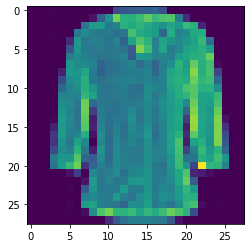

In [14]:
print(my_Dict[prediction], "\nconfidence = ", max(classifications[item]))
print("\n")
for i in range(10):
  print(my_Dict[i], round(classifications[item][i], 4))

%pylab inline
imgplot = plt.imshow(test_images[item])

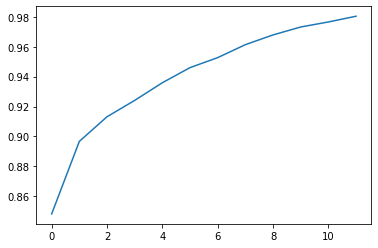

In [15]:
import pandas as pd

history_df = pd.DataFrame(predict.history)
history_df['accuracy'].plot()